In [2]:
from fbm import FBM
import pandas as pd
from tqdm import tqdm

def frac_brown_davies_harte(h, n, T, trajectories = 100):
    """An accurate fractional Brownian motion generator (1994)
    Simulation of benchmark trajectories using fbm library.
    (See: https://doi.org/10.1016/0378-4371(94)90531-2, https://github.com/crflynn/fbm)

    Parameters
    ----------
    h : float64
        Hurst exponente
    n: int64
        Number of data points
    T: int64
        lenght of the trajectory (max time)
    n: int64
        Number of data points
    trajectories: int64
        Number of trajectories (ensembles) generated
    """
    df_noise = {}
    df_traj = {}
    for tr in tqdm(range(trajectories)):
        f = FBM(n = n, hurst = h, length = T, method = 'daviesharte')
        if tr == 0:
            df_traj.update({"t" : f.times()})
        # Generate a fBm realization
        df_traj.update({f"traj_{tr}" : f.fbm()})
        df_noise.update({f"ns_{tr}" : f.fgn()})
    return pd.DataFrame(df_traj), pd.DataFrame(df_noise)

In [33]:
import sys
sys.path.append("../src/")
from fLe import fle#_guo as fle
import fBm_stats as fbs

In [29]:
df_BH, df_dBH = frac_brown_davies_harte(0.6, 500, 20, trajectories = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:01<00:00, 16.22it/s]


<AxesSubplot:>

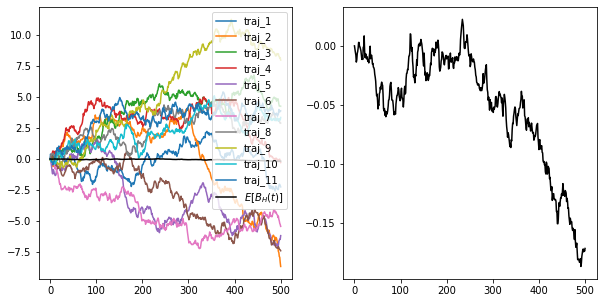

In [31]:
import matplotlib.pyplot as plt
cols = df_BH.columns
fig, ax = plt.subplots(1,2 , figsize = (10, 5))
axi = ax[0]
df_BH[cols[2:13]].plot(ax = axi)
df_BH[cols[2:]].mean(axis = 1).plot(ax = axi, label = r"$E[B_H(t)]$", color = "black")
axi.legend()

axi = ax[1]
df_BH[cols[2:]].mean(axis = 1).plot(ax = axi, label = r"$E[B_H(t)]$", color = "black")